# First Method GBA->LGBPHS

## PCA

In [1]:
from PIL import Image
import scipy.stats
import glob
import numpy as np
from numpy import linalg as la

import os
import matplotlib.pyplot as plt
from pylab import array, imshow
import math

In [ ]:
img_path_list = os.listdir('../face_data')
img_path_list = [os.path.join('../face_data', img_path) for img_path in img_path_list]

### Read Image Data

In [3]:
image_tensor_list = []
for filename in img_path_list:
    img = Image.open(filename).convert('L')
    img = array(img, dtype=float)/255.0
    img = scipy.misc.imresize(img, (100, 100), interp='bilinear', mode=None)
    image_tensor_list.append(img)

/home/agusgun/anaconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


In [4]:
def griddisplay(image_tensor_list):
    fig1, axes_array = plt.subplots(5, 5)
    fig1.set_size_inches(5,5)
    k=0
    for row in range(5):
        for col in range(5):    
            im = scipy.misc.imresize(image_tensor_list[k],(100,100),interp='bilinear', mode=None)
            image_plot = axes_array[row][col].imshow(im,cmap=plt.cm.gray) 
            axes_array[row][col].axis('off')
            k = k+1
    plt.show()

/home/agusgun/anaconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys


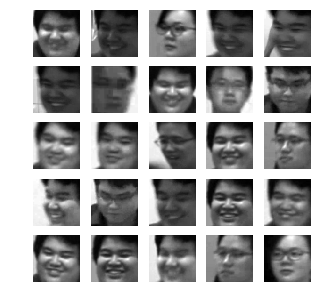

In [5]:
griddisplay(image_tensor_list)

In [6]:
flatenned_images_data = []
for i in range(len(image_tensor_list)):
    p = image_tensor_list[i].flatten()
    flatenned_images_data.append(p)

In [7]:
image_matrix = np.matrix(flatenned_images_data)
image_matrix.shape

(283, 10000)

In [8]:
image_matrix

matrix([[228, 197, 157, ...,  20,  20,  20],
        [113, 112, 121, ...,  46,  46,  45],
        [155, 152, 148, ...,  98,  99, 100],
        ...,
        [153, 153, 152, ...,  66,  66,  66],
        [134, 115,  89, ..., 199, 201, 202],
        [140, 140, 140, ...,  85,  85,  85]], dtype=uint8)

### Read Target and Show Mean Face

In [9]:
target = []
for img_path in img_path_list:
    if ('/1_' in img_path):
        target.append(1)
    elif ('/2_' in img_path):
        target.append(2)
    elif ('/7_' in img_path):
        target.append(3)
    elif ('/12_' in img_path):
        target.append(3)
    elif ('/17_' in img_path):
        target.append(4)

In [10]:
len(image_tensor_list)

283

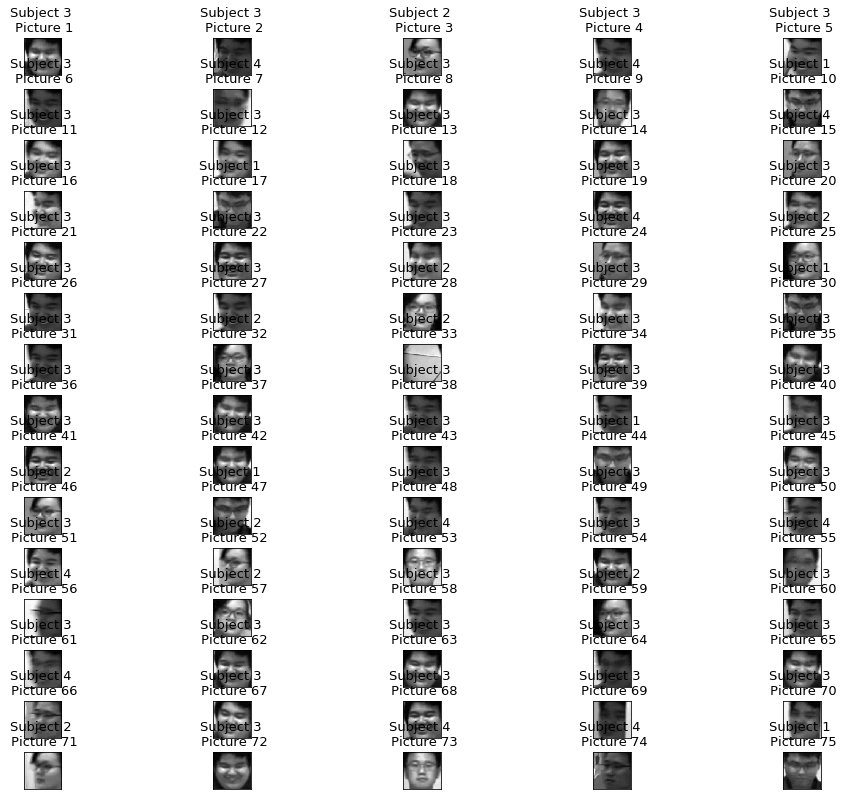

In [11]:
plt.figure(figsize=(13,11.6))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(len(image_tensor_list) - 208):
    plt.subplot(15, 5, i + 1)
    plt.imshow(image_tensor_list[i], cmap=plt.cm.gray)
    
    plt.title("Subject %s \n Picture %s" % (target[i],i+1), size=13)
    plt.xticks(( ))
    plt.yticks(())

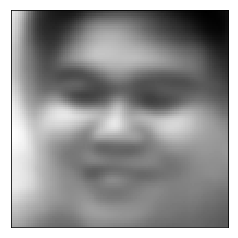

In [12]:
mean_image = np.mean(image_matrix, axis=0)
plt.figure
plt.imshow(mean_image.reshape((100, 100)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

### Split Data and Train PCA

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_matrix, target, test_size=0.2, random_state=30)

In [14]:
%time
from sklearn.decomposition import PCA

pca_component = 15
pca = PCA(pca_component, whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape(pca_component, -1)
print(eigenfaces.shape)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs
(15, 10000)


Plotting the 15 eigen faces :


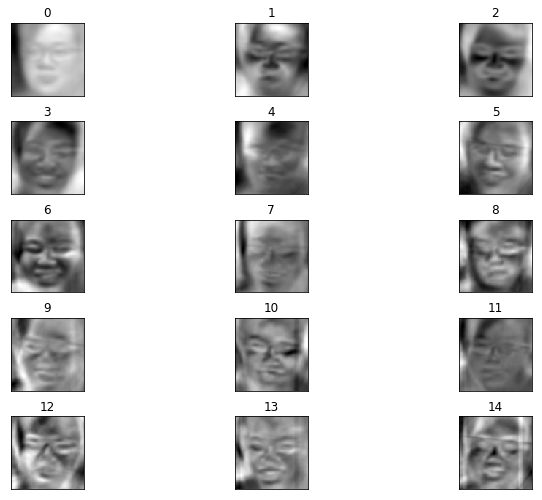

In [15]:
print("Plotting the 15 eigen faces :")
plt.figure(figsize=(1.8 * 5, 2.4 * 3))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(5* 3):
        plt.subplot(5, 3, i + 1)
        plt.imshow(eigenfaces[i].reshape((100, 100)), cmap=plt.cm.gray)
      
        plt.title(i, size=12)
        plt.xticks(())
        plt.yticks(())

### Train and Test

In [16]:
%time
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
y_pred = knn_classifier.predict(X_test_pca)
y_pred

array([3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 1, 1, 3, 3, 3, 3, 3, 3, 4,
       1, 2, 4, 3, 3, 3, 1, 3, 3, 2, 4, 4, 3, 3, 3, 3, 2, 3, 4, 4, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 4, 3, 2, 2, 3])

In [19]:
X_test_pca.shape

(57, 15)

In [20]:
from sklearn.metrics import accuracy_score, f1_score

print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test, average='weighted'))

0.9824561403508771
0.9817858216027552


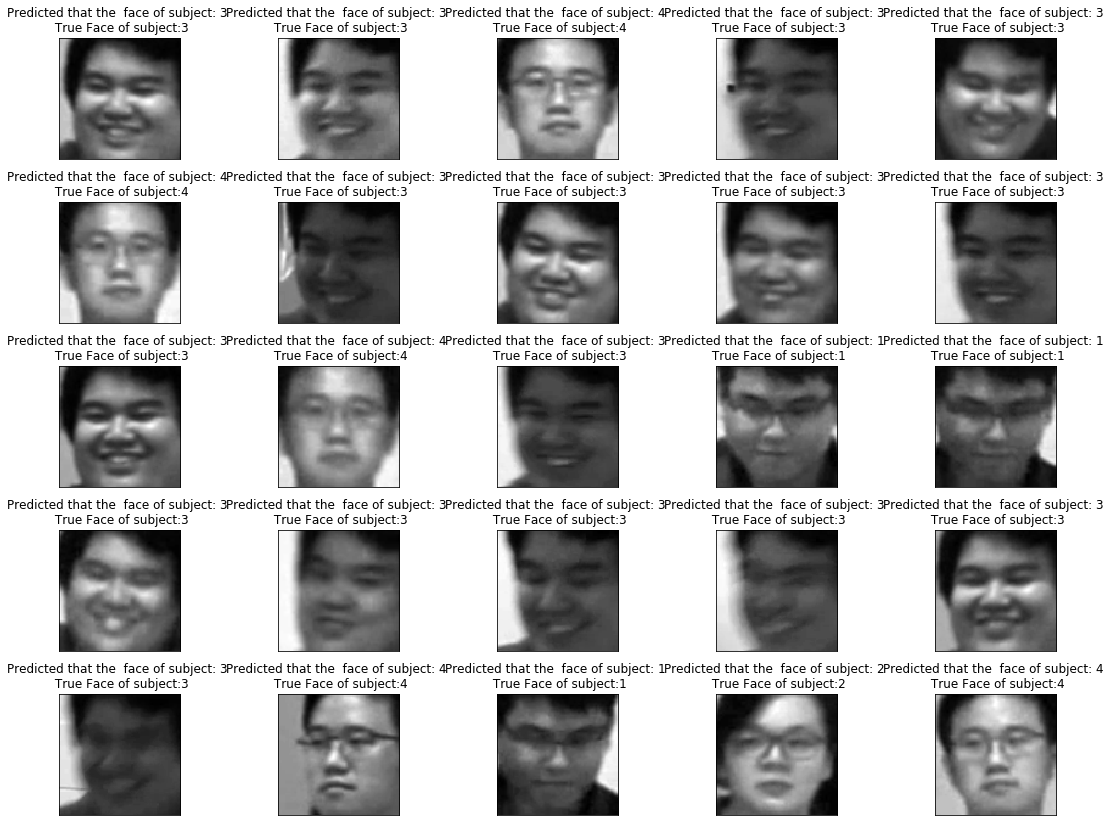

In [21]:
plt.figure(figsize=(3 * 5, 4 * 3))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape((100, 100)), cmap=plt.cm.gray)
      
    plt.title('Predicted that the  face of subject: %s \n True Face of subject:%s' % (y_pred[i], y_test[i]), size=12)
    plt.xticks(())
    plt.yticks(())

## LGBPHS

In [22]:
from bob.bio.face.extractor import LGBPHS
from bob.io.base import load
import bob.ip.color

### Testing Library

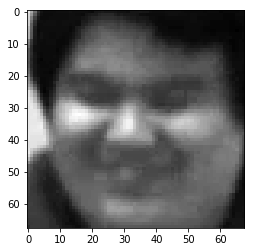

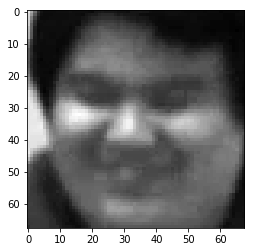

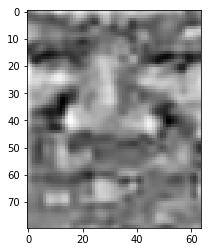

In [23]:
import bob.bio.face

image = load(img_path_list[0])
gray_image = bob.ip.color.rgb_to_gray(image)

plt.imshow(gray_image, cmap='gray')
plt.show()

CROPPED_IMAGE_HEIGHT = 80
CROPPED_IMAGE_WIDTH = 64

RIGHT_EYE_POS = (CROPPED_IMAGE_HEIGHT / 4, CROPPED_IMAGE_WIDTH / 4 - 1)
LEFT_EYE_POS  = (CROPPED_IMAGE_HEIGHT / 4, CROPPED_IMAGE_WIDTH / 4 * 3)

face_detector = bob.bio.face.preprocessor.FaceDetect(
    face_cropper='face-crop-eyes',
    use_flandmark=True,
    cropped_image_size=(CROPPED_IMAGE_HEIGHT, CROPPED_IMAGE_WIDTH),
    cropped_positions={'leye': LEFT_EYE_POS, 'reye': RIGHT_EYE_POS}
)
tan_triggs_offset_preprocessor = bob.bio.face.preprocessor.TanTriggs(
    face_cropper = face_detector,
)
image2 = face_detector(gray_image)
plt.imshow(gray_image, cmap='gray')
plt.show()

gray_image = tan_triggs_offset_preprocessor(gray_image)
plt.imshow(gray_image, cmap='gray')
plt.show()

### Experiment

In [24]:
image_tensor_list[0]

array([[228, 197, 157, ...,   9,   9,   9],
       [221, 188, 147, ...,   9,   9,   9],
       [213, 177, 132, ...,   9,   9,   9],
       ...,
       [ 54,  54,  54, ...,  20,  20,  20],
       [ 50,  53,  55, ...,  20,  20,  20],
       [ 45,  51,  56, ...,  20,  20,  20]], dtype=uint8)

In [25]:
feature_extractor = LGBPHS(
    # block setup
    block_size = 8,
    block_overlap = 0,
    # Gabor parameters
    gabor_sigma = math.sqrt(2.) * math.pi,
    # LBP setup (we use the defaults)
    # histogram setup
    sparse_histogram = False,
    split_histogram = 'blocks'
)

In [26]:
print(img_path_list[0])
print(img_path_list[1])
print(img_path_list[210])
print(img_path_list[211])

../face_data/12_3.png
../face_data/12_84.png
../face_data/17_17.png
../face_data/1_8.png


### Compare PIL Image with Load bob.bio

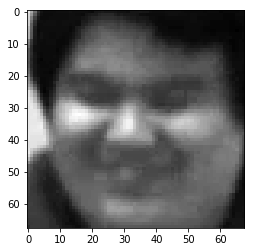

In [27]:
image = bob.ip.color.rgb_to_gray(load(img_path_list[0]))
plt.imshow(image, cmap='gray')

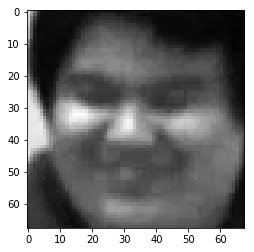

In [28]:
image2 = array(Image.open(img_path_list[0]).convert('L')).astype('float64')
plt.imshow(image2, cmap='gray')

### Start Experiment

In [29]:
feature_extractor = LGBPHS(
    # block setup
    block_size = 8,
    block_overlap = 0,
    # Gabor parameters
    gabor_sigma = math.sqrt(2.) * math.pi,
    # LBP setup (we use the defaults)
    # histogram setup
    sparse_histogram = False,
    split_histogram = 'blocks'
)

In [30]:
print(img_path_list[0])
print(img_path_list[1])
print(img_path_list[210])
print(img_path_list[211])

../face_data/12_3.png
../face_data/12_84.png
../face_data/17_17.png
../face_data/1_8.png


In [31]:
features_polpan_1 = feature_extractor(array(Image.open(img_path_list[0]).convert('L')).astype('float64'))
features_polpan_2 = feature_extractor(array(Image.open(img_path_list[1]).convert('L')).astype('float64'))
features_radit_1 = feature_extractor(array(Image.open(img_path_list[210]).convert('L')).astype('float64'))
features_vh_1 = feature_extractor(array(Image.open(img_path_list[211]).convert('L')).astype('float64'))

In [32]:
features_vh_1.shape

(64, 2360)

In [33]:
unique, counts = np.unique(features_polpan_1, return_counts=True)
hist_polpan_1 = dict(zip(unique, counts))
unique, counts = np.unique(features_polpan_2, return_counts=True)
hist_polpan_2 = dict(zip(unique, counts))
unique, counts = np.unique(features_radit_1, return_counts=True)
hist_radit_1 = dict(zip(unique, counts))
unique, counts = np.unique(features_vh_1, return_counts=True)
hist_vh_1 = dict(zip(unique, counts))

In [34]:
def convert_LGBPHSdict2arr(dictionary, n_component):
    arr = []
    for i in range(n_component):
        if i in dictionary:
            arr.append(dictionary[i])
        else:
            arr.append(0)
#     print(arr)
    return np.array(arr)

In [35]:
# bhattacharyya test
import numpy
import math

def bhattacharyya_distance(hist1, hist2):
    # calculate mean of hist1
    h1_ = np.mean(hist1);

    # calculate mean of hist2
    h2_ = np.mean(hist2);

    # calculate score
    score = 0;
    for i in range(len(hist1)):
        score += math.sqrt( hist1[i] * hist2[i] );

    score = math.sqrt( 1 - ( 1 / math.sqrt(h1_*h2_*len(hist1)*len(hist1)) ) * score );
    return score

In [36]:
bhattacharyya_distance(convert_LGBPHSdict2arr(hist_polpan_1, 64), convert_LGBPHSdict2arr(hist_polpan_2, 64))

0.008486019553126592

## Compare PCA vs LGBPHS

In [37]:
X_train_filename, X_test_filename, y_train_filename, y_test_filename = train_test_split(
    img_path_list, target, test_size=0.2, random_state=0
)

In [38]:
print(X_train_filename[2], y_train_filename[2])

../face_data/12_75.png 3


### PCA

In [39]:
def read_batch_image(img_path_list, resized_dimension=(100,100)):
    image_data_list = []
    for img_path in img_path_list:
        img = Image.open(img_path).convert('L')
        img = array(img, dtype=float)/255.0
        img = scipy.misc.imresize(img, resized_dimension, interp='bilinear', mode=None)
        image_data_list.append(img)
    return image_data_list

def flatten_batch_image(image_data_list):
    flattened_image_list = []
    for i in range(len(image_data_list)):
        flattened_image = image_data_list[i].flatten()
        flattened_image_list.append(flattened_image)
    return flattened_image_list

In [40]:
X_train_image_data = np.matrix(flatten_batch_image(read_batch_image(X_train_filename)))
X_test_image_data = np.matrix(flatten_batch_image(read_batch_image(X_test_filename)))

/home/agusgun/anaconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


In [41]:
pca_component = 15
pca = PCA(pca_component, whiten=True).fit(X_train_image_data)

In [42]:
X_train_pca = pca.transform(X_train_image_data)
X_test_pca = pca.transform(X_test_image_data)

In [43]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train_pca, y_train_filename)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [44]:
predicted = knn_classifier.predict(X_test_pca)

print(accuracy_score(predicted, y_test_filename))
print(f1_score(predicted, y_test_filename, average='weighted'))

0.9298245614035088
0.9296410962045637


### LGBPHS

In [45]:
def feature_extraction_batch_image(image_data_list, feature_extractor):
    feature_result = []
    for image_data in image_data_list:
        feature_result.append(feature_extractor(image_data.astype('float64')))
    return feature_result

def hist_extraction_batch_image(feature_list):
    hist_result = []
    N_BINS = 10
    for feature in feature_list:
        #Bin the values:
        h1 = np.histogram(feature,bins=N_BINS,range=(0,64), density=True)[0]
        hist_result.append(h1)
    return hist_result

In [46]:
feature_extractor = LGBPHS(
    # block setup
    block_size = 56,
    block_overlap = 0,
    # Gabor parameters
    gabor_sigma = math.sqrt(2.) * math.pi,
    # LBP setup (we use the defaults)
    lbp_radius = 2,
    # histogram setup
    sparse_histogram = False,
    split_histogram = 'blocks'
)

In [47]:
print(feature_extractor.gwt.number_of_wavelets)

40


In [48]:
%%time
X_base_image_data = flatten_batch_image(feature_extraction_batch_image(read_batch_image(X_train_filename, (120, 105)), feature_extractor))
X_test_image_data = flatten_batch_image(feature_extraction_batch_image(read_batch_image(X_test_filename, (120, 105)), feature_extractor))

/home/agusgun/anaconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


CPU times: user 33 s, sys: 0 ns, total: 33 s
Wall time: 33 s


In [49]:
X_test_image_data[0].shape

(4720,)

In [50]:
X_test_hist = hist_extraction_batch_image(X_test_image_data)
X_base_hist = hist_extraction_batch_image(X_base_image_data)

In [51]:
def predict_lbgphs(test_hist, base_hist_list, label):
    maks = math.inf
    predicted_label = 0
    for idx, base_hist in enumerate(base_hist_list):
        distance = bhattacharyya_distance(base_hist, test_hist)
        if distance < maks:
            maks = distance
            predicted_label = label[idx]
    return predicted_label

In [52]:
predicted_label = []
for idx, test_hist in enumerate(X_test_hist):
    predicted_label.append(predict_lbgphs(test_hist, X_base_hist, y_train_filename))

In [53]:
print(accuracy_score(predicted_label, y_test_filename))
print(f1_score(predicted_label, y_test_filename, average='weighted'))

0.42105263157894735
0.44986977247039167
